Problem Statement : Crop yield prediction and Crop Rotation

This project focuses on predicting crop yields based on various environmental and soil parameters using machine learning techniques. It aims to help farmers and agricultural stakeholders make informed decisions by providing accurate yield forecasts and crop recommendations tailored to specific conditions.

# 📂 Section 1: Loading Dataset

In [5]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# loading the dataset

crop_df = pd.read_csv("Crop_recommendationV2.csv")

# 📂 Section 2: Data Preprocessing

In [9]:
# dataset shape

print("Dataset Shape:", crop_df.shape)

Dataset Shape: (2200, 23)


This dataset has 2200 rows and 23 columns

In [12]:
# dataset statistical summary

print("Stastical summary", crop_df.describe())

Stastical summary                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  soil_moisture    soil_type  \
count  2200.000000  2200.000000    2200.000000  2200.000000   
mean      6.469480   103.463655      20.151388     1.991364   
std       0.773938    54.958389       5.793720     0.812263   
min       3.504752    20.211267      10.024260     1.000000   


The dataset contains agricultural samples with a wide range of values across soil, climate, crop, and management features. Key variables like nitrogen (N), phosphorus (P), potassium (K), and rainfall show high variability, indicating diverse agricultural conditions. Most variables have well-distributed values, with no extreme skewness. Overall, the data appears comprehensive and suitable for modeling crop growth, soil health, or precision agriculture practices.


In [15]:
# dataset information

print(crop_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

Dataset Description:

- **N (ppm)**: Nitrogen concentration in the soil.
- **P (ppm)**: Phosphorus concentration in the soil.
- **K (ppm)**: Potassium concentration in the soil.
- **Temperature (°C)**: Ambient temperature at the farm.
- **Humidity (%)**: Relative humidity in the environment.
- **pH**: Acidity or alkalinity of the soil.
- **Rainfall (mm)**: Total rainfall received at the location.
- **Soil Moisture (%)**: Percentage of water content in the soil.
- **Soil Type**:
  - 1 = Sandy  
  - 2 = Loamy  
  - 3 = Clay
- **Sunlight Exposure (hrs/day)**: Average daily sunlight received.
- **Wind Speed (km/h)**: Wind velocity at the site.
- **CO₂ Concentration (ppm)**: Atmospheric carbon dioxide levels.
- **Organic Matter (%)**: Proportion of organic content in the soil.
- **Irrigation Frequency (times/week)**: Number of times irrigation is applied weekly.
- **Crop Density (plants/m²)**: Number of plants per square meter.
- **Pest Pressure (index)**: Indicator of pest infestation severity.
- **Fertilizer Usage (kg/ha)**: Fertilizer applied per hectare of land.
- **Growth Stage**:
  - 1 = Seedling  
  - 2 = Vegetative  
  - 3 = Flowering
- **Urban Area Proximity (km)**: Distance from the farm to the closest urban area.
- **Water Source Type**:
  - 1 = River  
  - 2 = Groundwater  
  - 3 = Recycled
- **Frost Risk (index)**: Index representing risk of frost.
- **Water Usage Efficiency (L/kg)**: Liters of water used per kilogram of crop yield.
- **Label**: Target variable indicating the crop type.


In [18]:
# datatpes

print("Data Types:", crop_df.dtypes)

Data Types: N                           int64
P                           int64
K                           int64
temperature               float64
humidity                  float64
ph                        float64
rainfall                  float64
label                      object
soil_moisture             float64
soil_type                   int64
sunlight_exposure         float64
wind_speed                float64
co2_concentration         float64
organic_matter            float64
irrigation_frequency        int64
crop_density              float64
pest_pressure             float64
fertilizer_usage          float64
growth_stage                int64
urban_area_proximity      float64
water_source_type           int64
frost_risk                float64
water_usage_efficiency    float64
dtype: object


In [22]:
# missing values

print("Missing Values:\n", crop_df.isnull().sum())

Missing Values:
 N                         0
P                         0
K                         0
temperature               0
humidity                  0
ph                        0
rainfall                  0
label                     0
soil_moisture             0
soil_type                 0
sunlight_exposure         0
wind_speed                0
co2_concentration         0
organic_matter            0
irrigation_frequency      0
crop_density              0
pest_pressure             0
fertilizer_usage          0
growth_stage              0
urban_area_proximity      0
water_source_type         0
frost_risk                0
water_usage_efficiency    0
dtype: int64


From this we come to no that our dataset doesn't have null values and most of the datatypes are in integer and float format except the crop label which is of object datatype.

In [25]:
# duplicate rows

print("Duplicate Rows:", crop_df.duplicated().sum())

Duplicate Rows: 0


From this we can infer that there are no dulicate rows in our dataset.

In [30]:
# top 5 records

print(crop_df.head())

    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture  soil_type  ...  organic_matter  irrigation_frequency  \
0      29.446064          2  ...        3.121395                     4   
1      12.851183          3  ...        2.142021                     4   
2      29.363913          2  ...        1.474974                     1   
3      26.207732          3  ...        8.393907                     1   
4      28.236236          2  ...        5.202285                     3   

   crop_density  pest_pressure  fertilizer_usage  growth_stage  \
0     11.743910      57.607308        188.194958             1   
1     16

# 📂 Section 3: EDA (Exploratory Data Analysis)

### 🌾 Crop Label Distribution

This block of code visualizes the distribution of different crop labels in the dataset using a horizontal bar chart.
- It uses `seaborn.countplot` to count the occurrences of each crop type (label).
- The crops are sorted in descending order based on frequency.
- This helps us understand the class balance — whether the dataset is imbalanced or uniformly distributed across crop types.

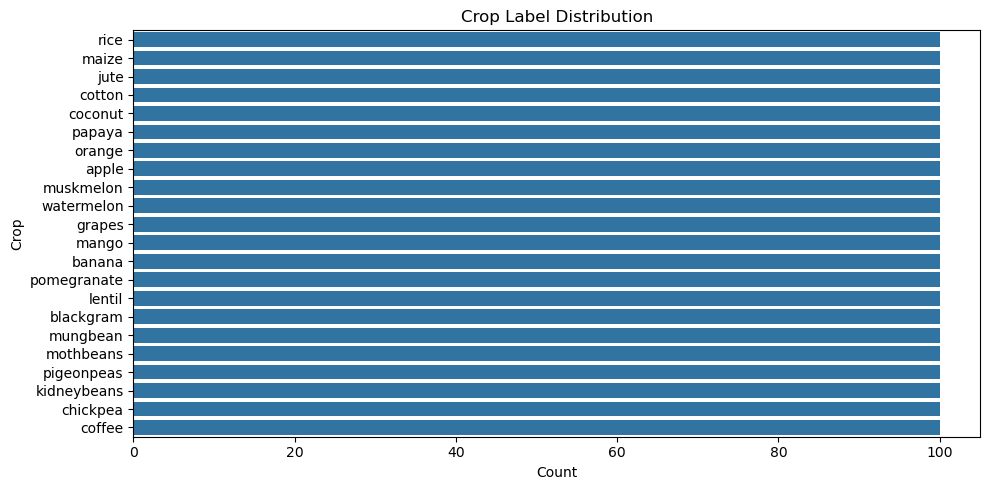

In [40]:
# crop label distribution

plt.figure(figsize=(10, 5))
sns.countplot(y='label', data=crop_df, order=crop_df['label'].value_counts().index)
plt.title("Crop Label Distribution")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

From this graph we can infer that 22 unique crop labels each with 100 distribution of records.

### 🔥 Correlation Heatmap Between Variables

This block generates a heatmap to visualize the correlation between all **numerical features** in the dataset.

- It calculates the **Pearson correlation coefficient** between pairs of numerical variables.
- A **heatmap** is plotted using `seaborn` to show how strongly features are linearly related to one another.
- The **color intensity** (from cool to warm) indicates the strength and direction of the correlation:
  - Dark red = strong positive correlation (+1)
  - Dark blue = strong negative correlation (−1)
  - White = no correlation (0)
- This helps identify:
  - Multicollinearity
  - Redundant features
  - Potential feature importance for modeling


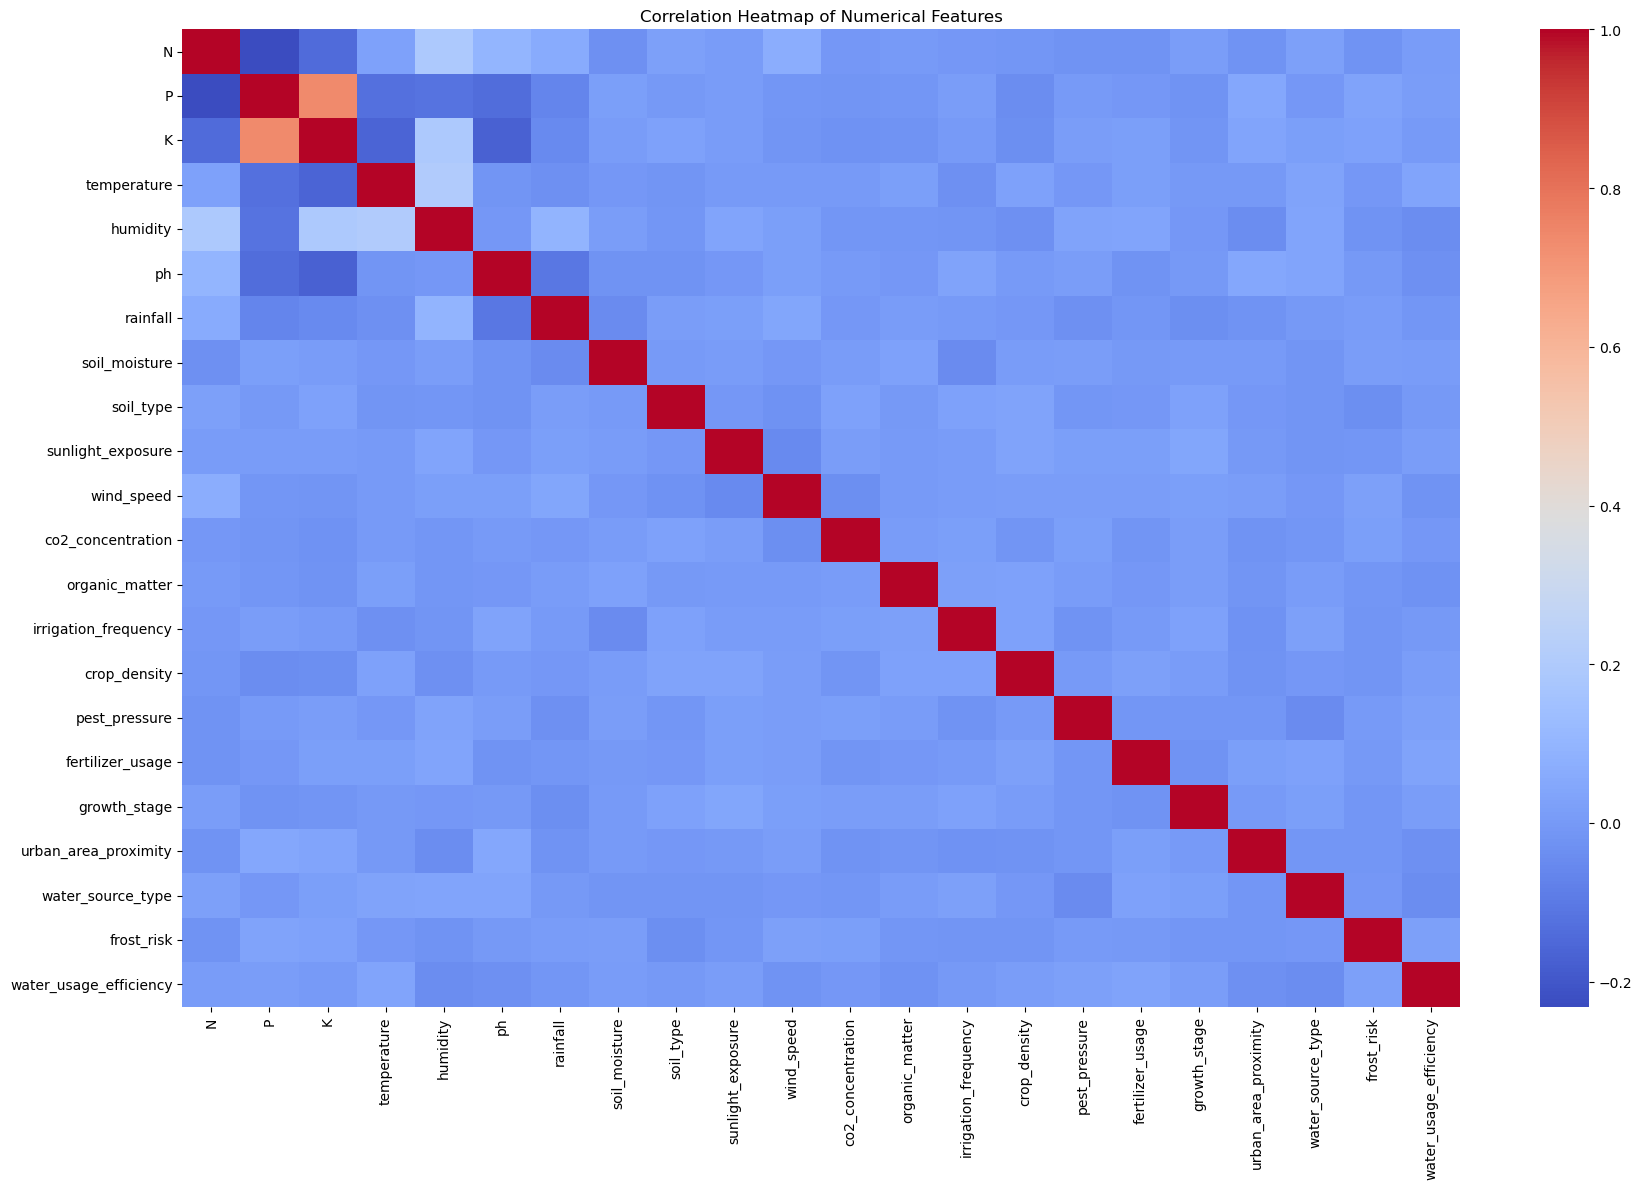

In [43]:
# correlation heatmap between the variables

plt.figure(figsize=(18, 12))
corr_matrix = crop_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

From the Correlation heatmap, there is a strong positive correlation between N, P, and K.
Most of the other features are weakly correlated.

### 📊 Distribution Plots for Important Numerical Features

This section visualizes the distribution of selected key numerical features to understand their spread, skewness, and outliers.

The following features are chosen based on their importance in agriculture and crop growth:
- `N`, `P`, `K` (essential soil nutrients)
- `temperature`, `humidity` (climate conditions)
- `rainfall`, `soil_moisture` (water availability)
- `ph` (soil chemistry)
- `fertilizer_usage`, `crop_density` (agronomic inputs)


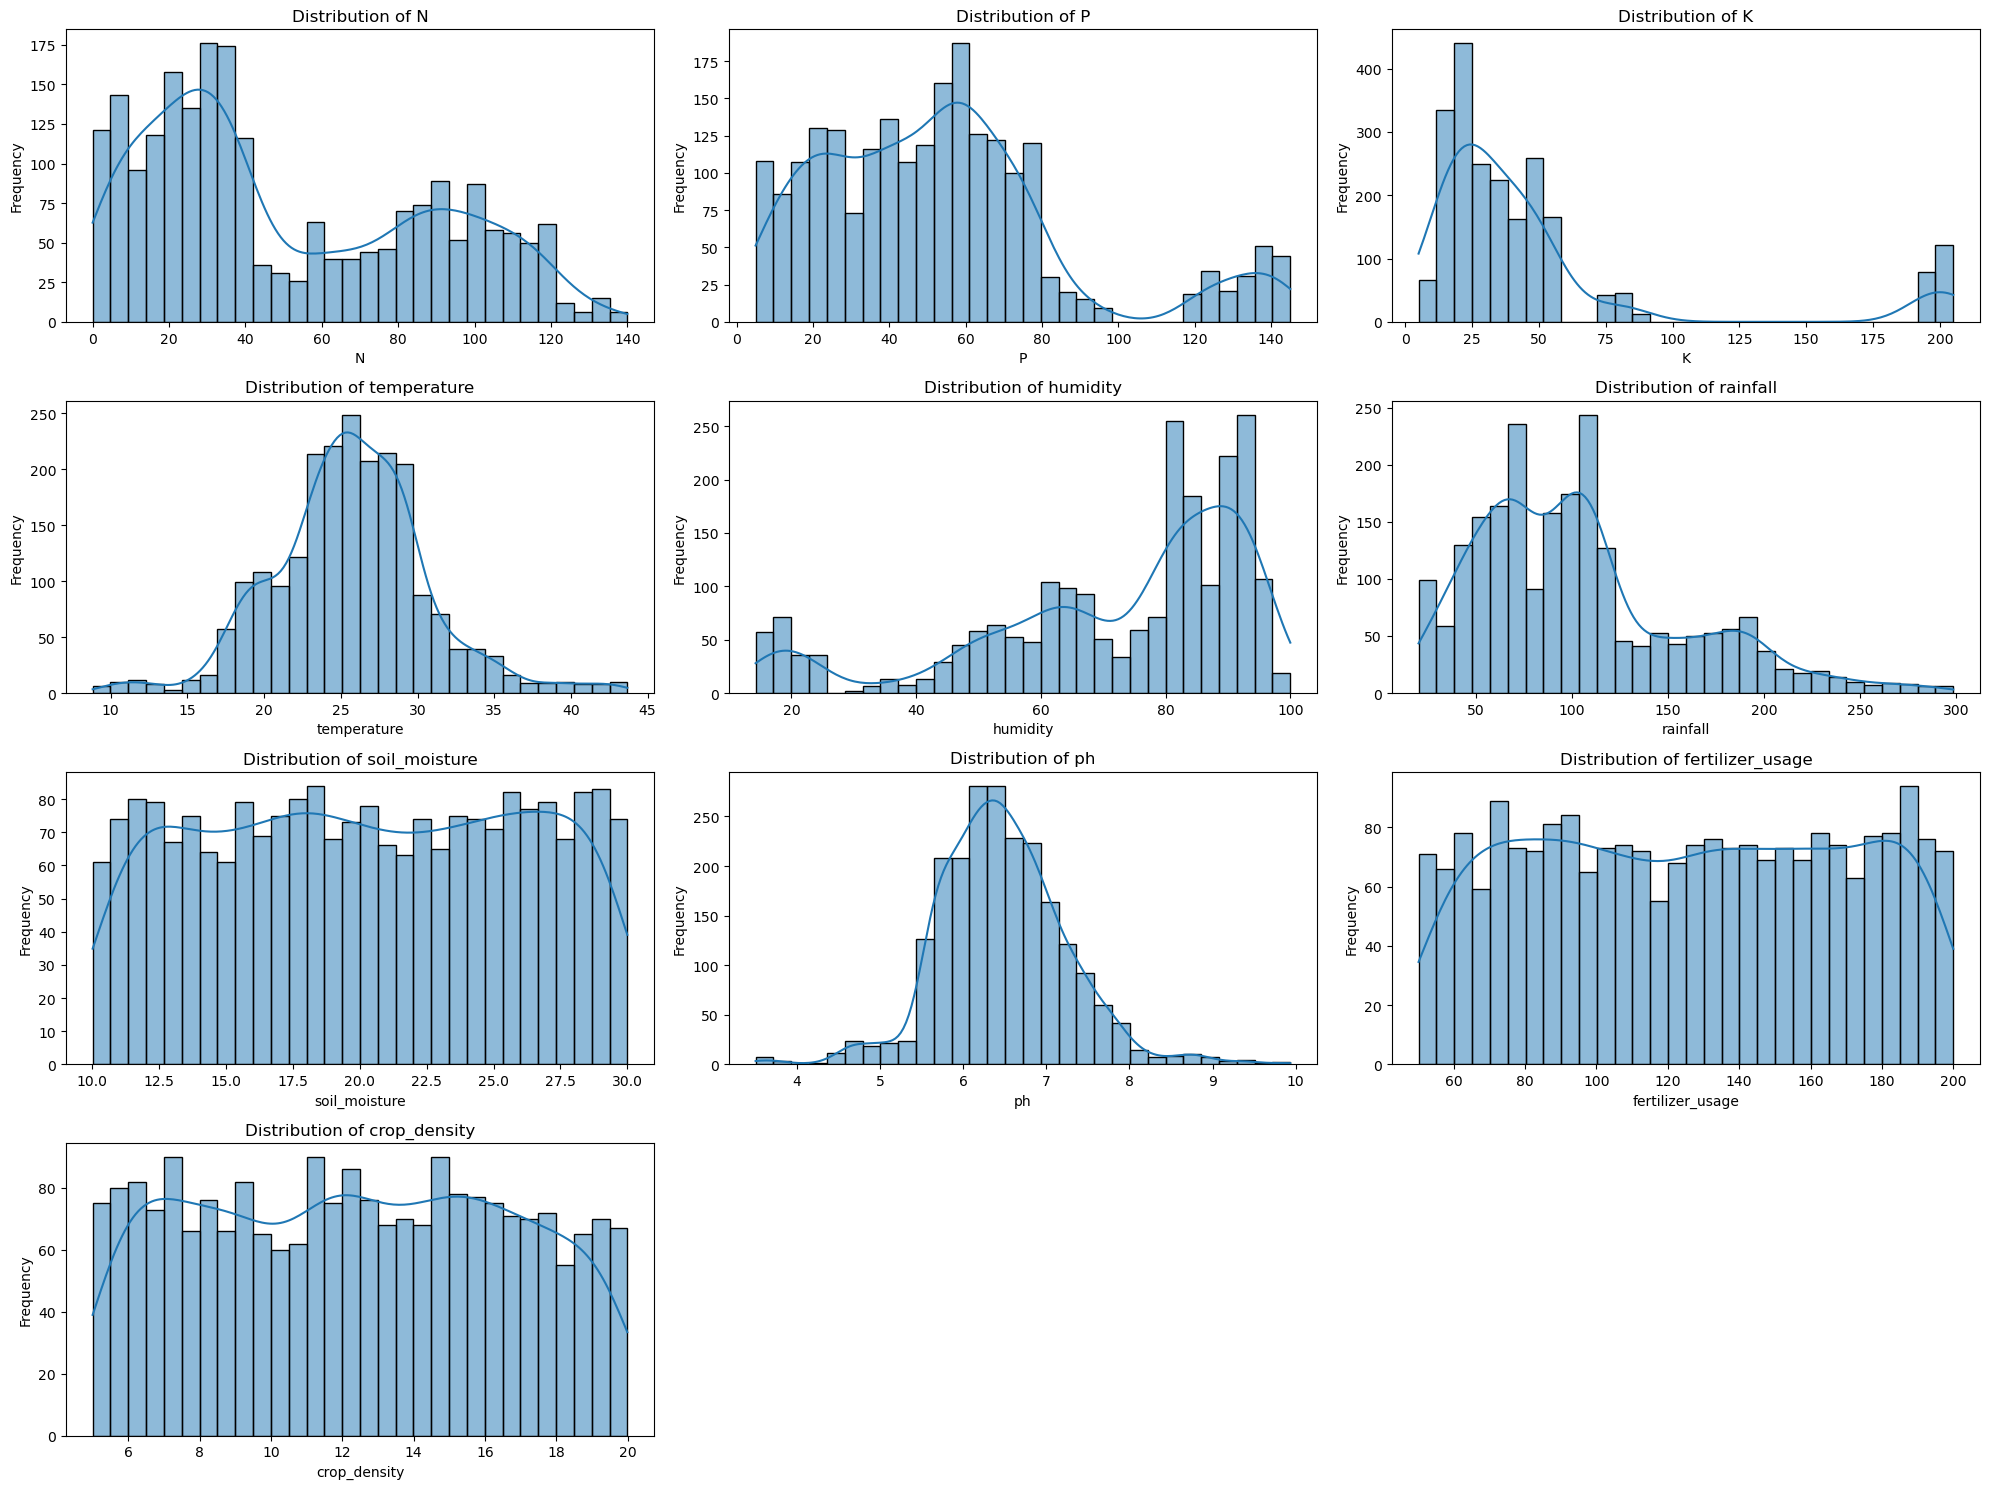

In [55]:
# distribution plots for features

import matplotlib.pyplot as plt
import seaborn as sns

important_features = [
    'N', 'P', 'K',
    'temperature', 'humidity',
    'rainfall', 'soil_moisture',
    'ph', 'fertilizer_usage', 'crop_density'
]

# Set up the subplot grid
plt.figure(figsize=(20, 15)) 

for idx, col in enumerate(important_features):
    plt.subplot(4, 3, idx + 1)
    sns.histplot(crop_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Inference of these graphs are:

**Nitrogen (N)**  
- Right-skewed distribution.  
- Most values are concentrated between 0–60 ppm, with a long tail toward higher values.  
- Indicates a majority of soils have low to moderate nitrogen levels.

**Phosphorus (P)**  
- Slightly bimodal distribution with peaks around 50–70 ppm and 130–140 ppm.  
- Suggests the presence of two dominant soil profiles or crop requirements influencing phosphorus levels.

**Potassium (K)**  
- Strong right-skew; most values are in the 0–60 ppm range.  
- A few high-K samples possibly result from heavy fertilization or specific soil types.

**Temperature (°C)**  
- Appears to follow a normal (bell-shaped) distribution centered around 25°C.  
- Indicates consistent ambient conditions across most samples.

**Humidity (%)**  
- Multimodal distribution, indicating both low and high humidity regions.  
- Could result from varying microclimates or seasonal differences.

**Rainfall (mm)**  
- Right-skewed, with most values between 50–150 mm.  
- A few regions receive extremely high rainfall, which may impact crop choices.

**Soil Moisture (%)**  
- Fairly uniform distribution, showing a wide range of moisture levels.  
- Likely influenced by different irrigation practices or climatic conditions.

**pH**  
- Normal distribution centered around 6.5–7, ideal for most crops.  
- Reflects well-balanced soil acidity and alkalinity.

**Fertilizer Usage (kg/ha)**  
- Almost uniform distribution between 50–200 kg/ha.  
- Suggests diverse fertilization strategies among farms.

**Crop Density (plants/m²)**  
- Fairly uniform distribution between 6–20 plants/m².  
- Indicates relatively consistent planting practices, varying by crop.


### 📦 Outlier Detection Using Box Plots for Key Features

Box plots were used to visually identify outliers in the most important numerical features such as N, P, K, rainfall, and others. These visualizations help detect extreme values that may impact modeling or statistical analysis.


In [ ]:
# boxplot for outlier detection

# Set up the subplot grid
plt.figure(figsize=(20, 15))

for idx, col in enumerate(important_features):
    plt.subplot(4, 3, idx + 1)
    sns.boxplot(x=crop_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Inference of these graphs are:

**• N (Nitrogen):**  
The distribution appears fairly symmetric with no major outliers, suggesting a well-balanced spread of nitrogen values across the dataset.

**• P (Phosphorus):**  
There are noticeable outliers at the higher end, indicating some data points have unusually high phosphorus levels.

**• K (Potassium):**  
This feature has significant high-value outliers. The large spread at the upper end suggests a wide variability in potassium content.

**• Rainfall:**  
Numerous high-end outliers are present, indicating extreme rainfall values that could impact analysis if not treated appropriately.

**• Humidity:**  
The distribution is slightly skewed to the right, with a few minor low-end outliers. Most values cluster at higher humidity levels.

**• Soil Moisture:**  
Uniform distribution with no visible outliers, suggesting consistent soil moisture levels across the dataset.

**• Fertilizer Usage:**  
Fertilizer usage is evenly spread with a wide interquartile range and no significant outliers, implying diverse fertilizer application strategies.

**• Crop Density:**  
Symmetric distribution without notable outliers, indicating consistent crop planting density.



### 🌾 Average N, P and K Levels by Crop Type

In [86]:
# N, P, K and Soil moisture of each type of crop

grouped = crop_df.groupby('label')[['N', 'P', 'K']].mean().sort_values(by='N', ascending=False)
print("\nAverage N, P, K per Crop:\n", grouped)


Average N, P, K per Crop:
                   N       P       K
label                              
cotton       117.77   46.24   19.56
coffee       101.20   28.74   29.94
muskmelon    100.32   17.72   50.08
banana       100.23   82.01   50.05
watermelon    99.42   17.00   50.22
rice          79.89   47.58   39.87
jute          78.40   46.86   39.99
maize         77.76   48.44   19.79
papaya        49.88   59.05   50.04
chickpea      40.09   67.79   79.92
blackgram     40.02   67.47   19.24
grapes        23.18  132.53  200.11
coconut       21.98   16.93   30.59
mothbeans     21.44   48.01   20.23
mungbean      20.99   47.28   19.87
apple         20.80  134.22  199.89
kidneybeans   20.75   67.54   20.05
pigeonpeas    20.73   67.73   20.29
mango         20.07   27.18   29.92
orange        19.58   16.55   10.01
pomegranate   18.87   18.75   40.21
lentil        18.77   68.36   19.41


<Figure size 1400x600 with 0 Axes>

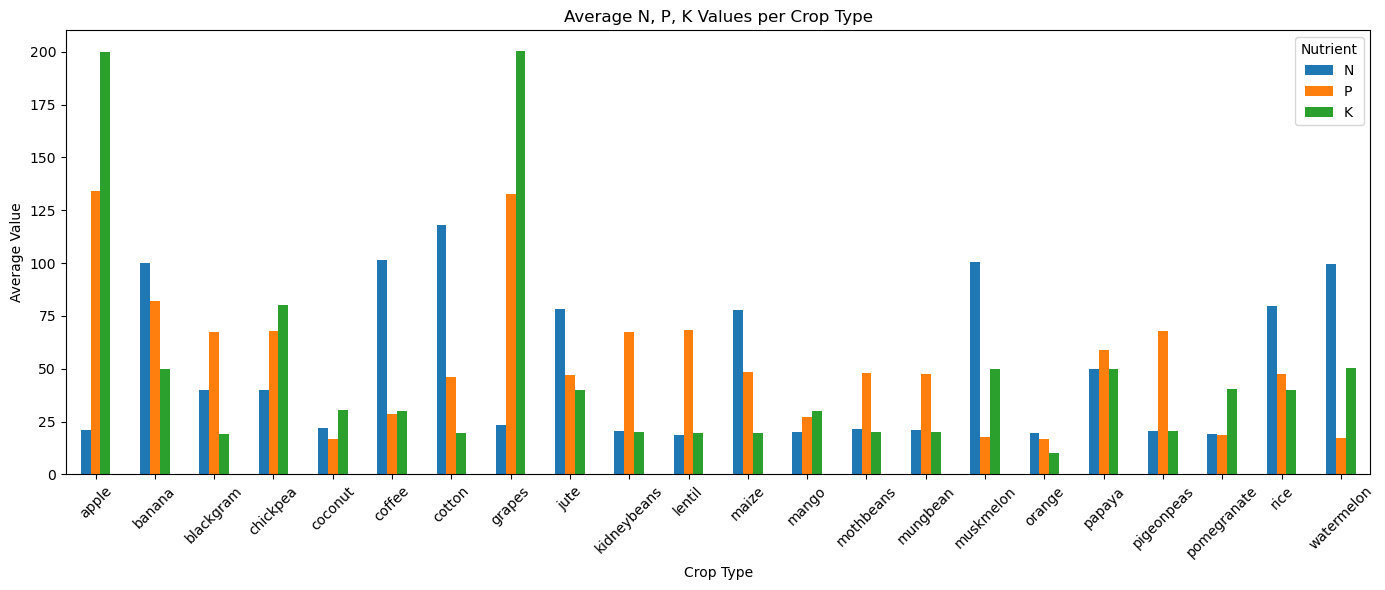

In [29]:
# visualization of average N, P, K values for each crop

npk_avg = df.groupby('label')[['N', 'P', 'K']].mean()

plt.figure(figsize=(14, 6))
npk_avg.plot(kind='bar', figsize=(14, 6))
plt.title("Average N, P, K Values per Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title='Nutrient')
plt.tight_layout()
plt.show()

Inference: Average N, P and K per Crop are:

**• High Nitrogen Crops:**  
Cotton, coffee, muskmelon, banana, and watermelon have high average nitrogen levels (>99), indicating their greater nitrogen demand for optimal growth.

**• High Phosphorus Crops:**  
Grapes (132.53) and apple (134.22) show the highest phosphorus needs by a large margin. These crops are phosphorus-intensive compared to others.

**• High Potassium Crops:**  
Grapes (200.11) and apple (199.89) again top the list for potassium requirements, followed by chickpea and papaya, reflecting their higher nutrient consumption.

**• Balanced Nutrient Crops:**  
Crops like rice, jute, and maize have moderately balanced NPK levels, making them easier to manage in standard soil conditions.

**• Low Nutrient Requiring Crops:**  
Crops such as pomegranate, orange, lentil, and mango require comparatively lower nitrogen and phosphorus levels, which may suit nutrient-deficient soils.

**• Unique Patterns:**  
- **Grapes and apple** stand out with exceptionally high P and K requirements.
- **Chickpea** shows an unusual mix: low N, high P, and high K.
- **Maize** has moderate N and low K, with the highest average soil moisture among all crops.


### 🌍 Distribution of Different Soil Types in the Dataset

This pie chart illustrates the proportion of each soil type—**Sandy**, **Loamy**, and **Clay**—present in the dataset, helping to understand the dominant soil characteristics across the studied regions.


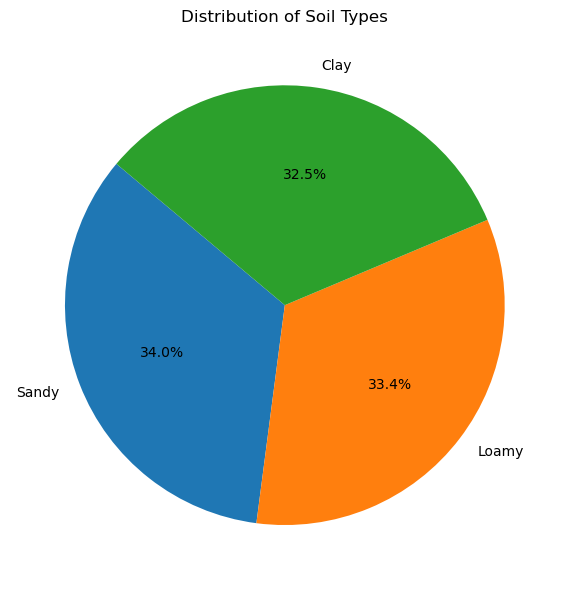

In [91]:
# soil type distribution

soil_counts = crop_df['soil_type'].value_counts()
soil_labels = ['Sandy', 'Loamy', 'Clay']
plt.figure(figsize=(6, 6))
plt.pie(soil_counts, labels=soil_labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Soil Types")
plt.tight_layout()
plt.show()

From this chart, we come to know that all the three types of soil are equally distributed and relatively balanced.

### 🚰 Distribution of Water Source Types in the Dataset

This chart shows the proportion of water sources—**River**, **Groundwater**, and **Recycled**—used for irrigation, helping to understand agricultural dependence on various water resources.


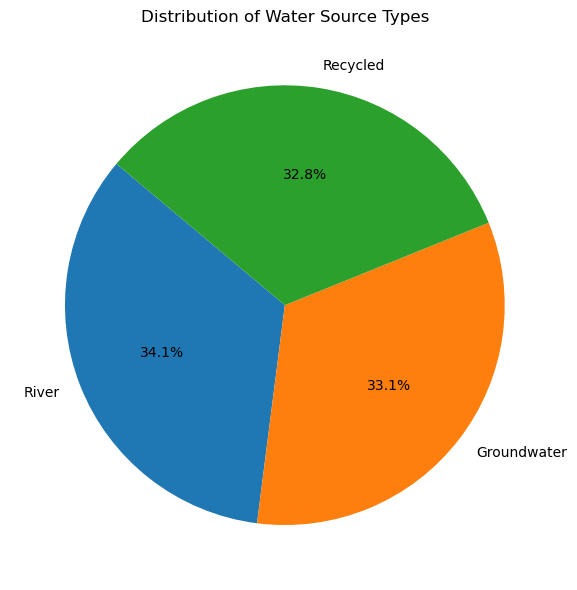

In [31]:
# water source distribution

water_counts = crop_df['water_source_type'].value_counts()
water_labels = ['River', 'Groundwater', 'Recycled']
plt.figure(figsize=(6, 6))
plt.pie(water_counts, labels=water_labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Water Source Types")
plt.tight_layout()
plt.show()

From this chart, we come to know that all the three types of water sources are equally used with none being dominant over one another.

### 🌦️ Average Temperature, Humidity, and Rainfall by Crop Type

This bar chart visualizes the average environmental conditions—**temperature**, **humidity**, and **rainfall**—associated with each crop type in the dataset, offering insights into their preferred growing conditions.


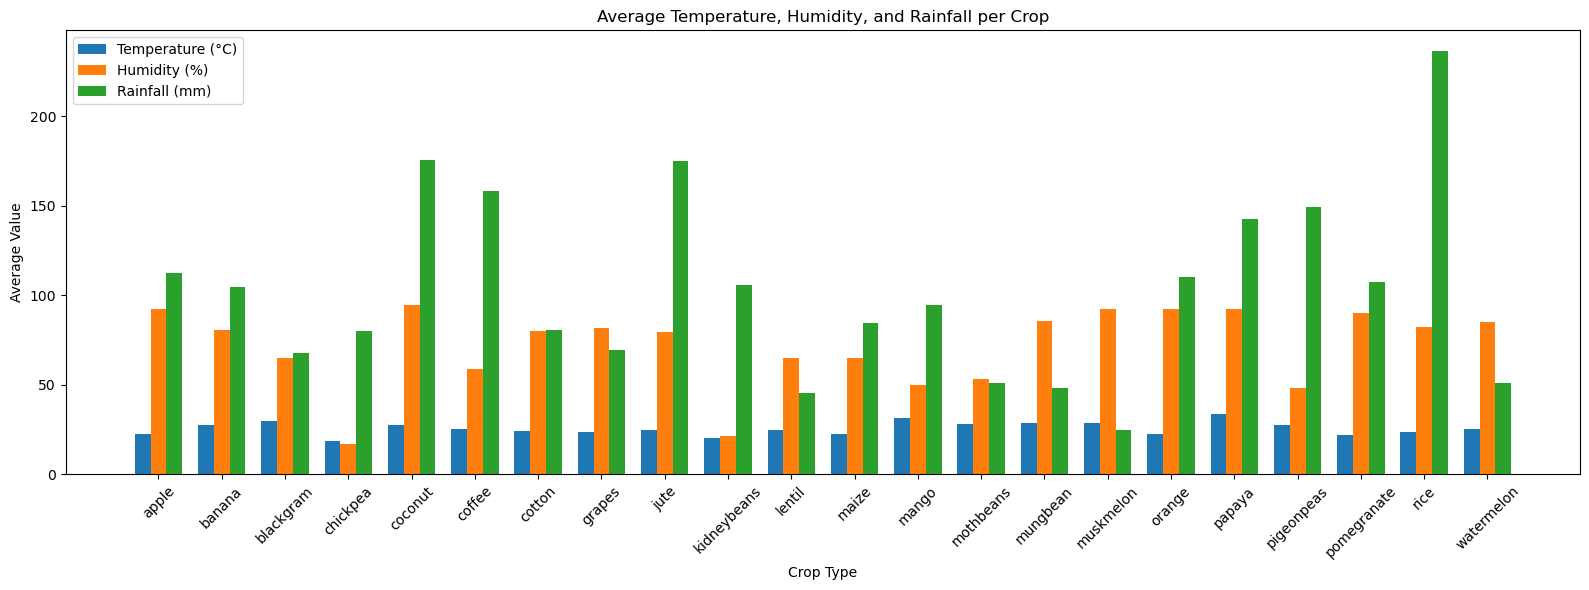

In [103]:
# average temperature, humidity and rainfall for each crop

avg_env = crop_df.groupby('label')[['temperature', 'humidity', 'rainfall']].mean().reset_index()

labels = avg_env['label']
temperature = avg_env['temperature']
humidity = avg_env['humidity']
rainfall = avg_env['rainfall']

x = np.arange(len(labels))  
width = 0.25  

plt.figure(figsize=(16, 6))
plt.bar(x - width, temperature, width, label='Temperature (°C)')
plt.bar(x, humidity, width, label='Humidity (%)')
plt.bar(x + width, rainfall, width, label='Rainfall (mm)')

plt.xlabel('Crop Type')
plt.ylabel('Average Value')
plt.title('Average Temperature, Humidity, and Rainfall per Crop')
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

From the bar chart, we can draw the following observations:

- **Rice** requires the highest amount of rainfall, indicating it is a highly water-dependent crop, typically grown in regions with heavy precipitation.
- **Papaya**, **pomegranate**, and **pigeonpeas** also show high rainfall needs, though less than rice.
- **Banana** and **muskmelon** have the highest average humidity requirements, suggesting their preference for more humid climates.
- **Orange**, **papaya**, and **muskmelon** are grown in relatively warmer climates (higher average temperatures).
- **Lentil**, **mungbean**, and **blackgram** require lower rainfall and relatively moderate temperature and humidity, indicating suitability for semi-arid regions.
- Most crops maintain a temperature range between **20°C–30°C**, showing a common requirement for warm growing conditions.

### 🌱 Average Fertilizer and Water Usage Efficiency by Crop Type

This line chart illustrates the average **fertilizer usage** and **water usage efficiency** for each crop type, offering insights into input optimization and resource management across different crops.


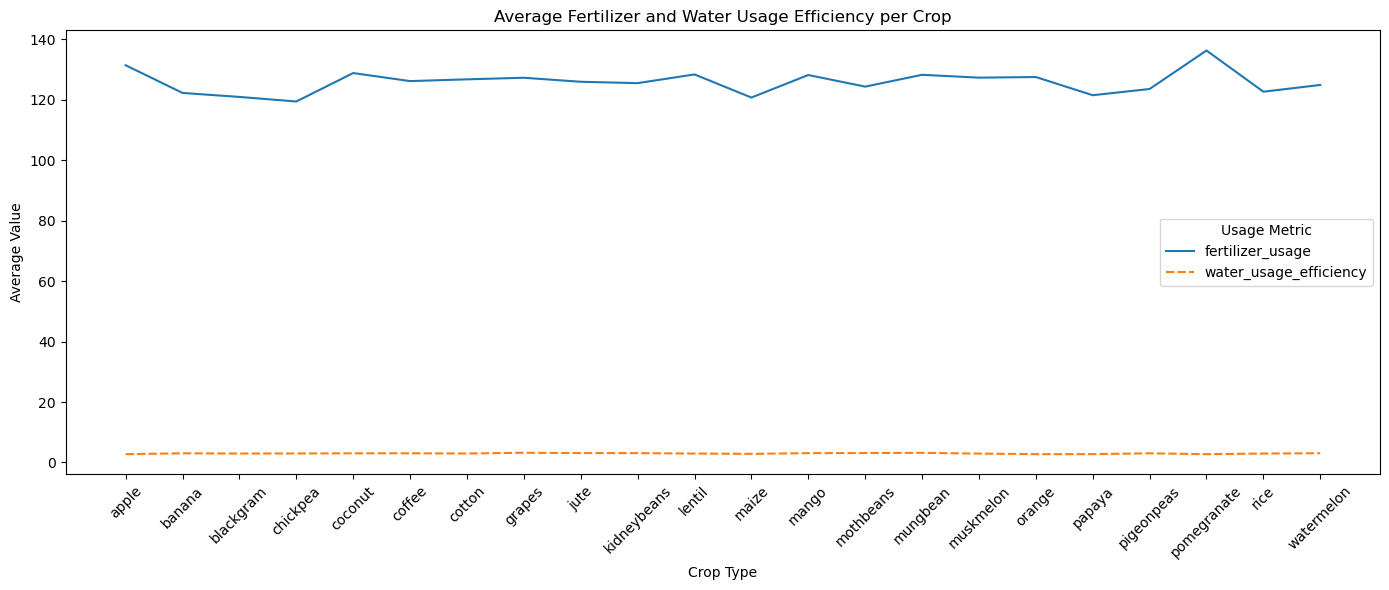

In [33]:
# fertilizer and water usage efficiency for each crop

avg_usage = df.groupby('label')[['fertilizer_usage', 'water_usage_efficiency']].mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_usage)
plt.title("Average Fertilizer and Water Usage Efficiency per Crop")
plt.xlabel("Crop Type")
plt.ylabel("Average Value")
plt.xticks(ticks=range(len(avg_usage.index)), labels=avg_usage.index, rotation=45)
plt.legend(title='Usage Metric')
plt.tight_layout()
plt.show()

From the line chart, we infer:

- **Fertilizer usage** shows noticeable variation across crop types. Crops like **pigeonpeas**, **coconut**, and **apple** appear to require higher amounts of fertilizer on average.
- **Water usage efficiency** remains relatively constant across all crops, with only minor fluctuations. This suggests that while crops differ in how much water they use, their efficiency in utilizing water resources is similar.
- Crops like **blackgram**, **chickpea**, and **mungbean** demonstrate relatively lower fertilizer usage, potentially making them more sustainable options for regions aiming to reduce chemical input.